In [1]:
import pandas as pd
df = pd.read_csv('c:/data/iris/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [2]:
X = df[df.columns[:-2]]
y = df['Species']

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_score = model.decision_function(X_test)
print(y_score[::10])
print(model.predict(X_test[::10]))

[[ 6.77648729  3.02992388 -9.80641117]
 [-5.93360747  1.17302992  4.76057756]
 [ 6.62641515  2.67700923 -9.30342439]]
[0 2 0]


In [5]:
from sklearn.metrics import confusion_matrix
y_hat = model.predict(X_test)
confusion_matrix(y_test, y_hat)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[0,1,2])
y[::20]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

{0: 1.0, 1: 0.475, 2: 1.0}


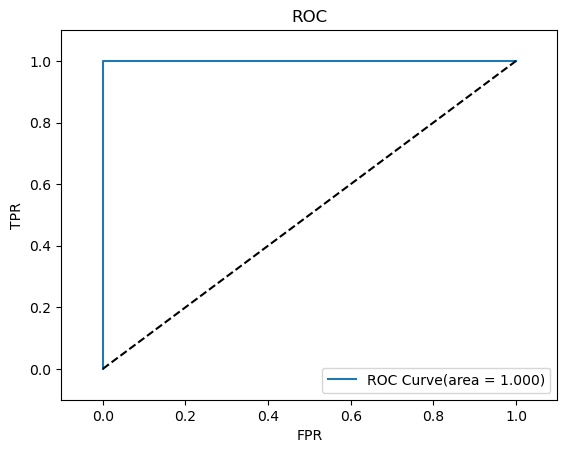

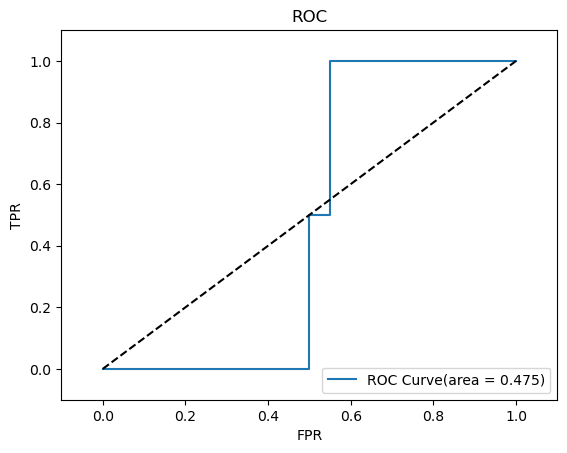

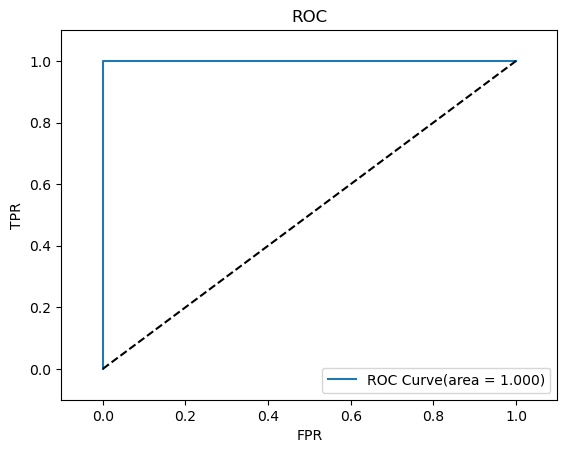

In [9]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = model.decision_function(X_test)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc)

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC Curve(area = %.3f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc='lower right')
    plt.show()